# Auto MLP

This notebook was executed in Google Colab using A100-GPU.

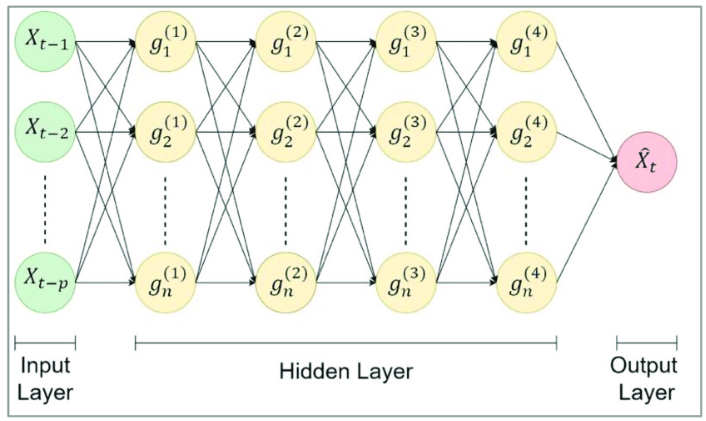

### Start of execution

In [1]:
import time

In [2]:
start = time.time()

### 1. Setting the environment

In [3]:
!pip install -q neuralforecast

### 2. Import Libraries

In [4]:
import pandas as pd
from ray import tune
import matplotlib.pyplot as plt
from neuralforecast.auto import AutoMLP
from neuralforecast.core import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

### 3. Load Datasets

In [5]:
Y_df = AirPassengersDF
Y_df = Y_df.reset_index(drop=True)
Y_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


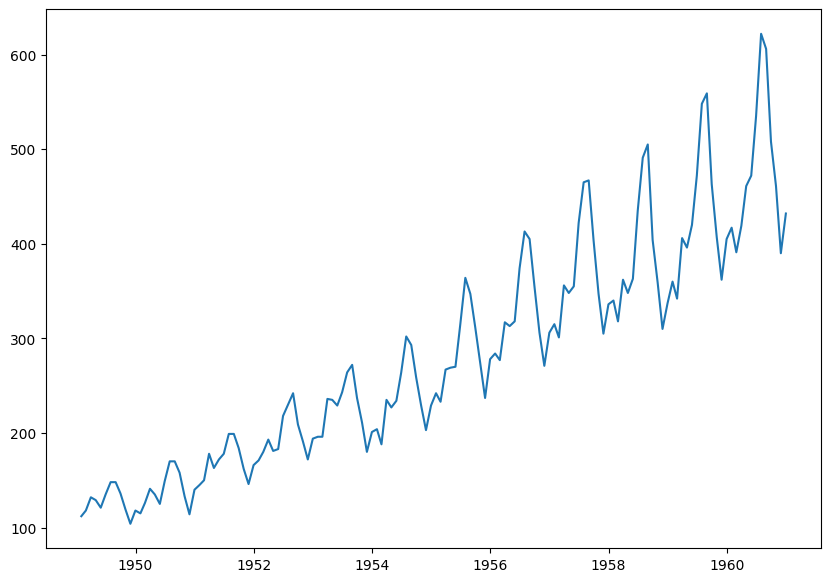

In [6]:
plt.figure(figsize = (10, 7))
plt.plot(Y_df['ds'], Y_df['y'])
plt.show()

### 4. Models

In [7]:
horizon = 12

models = [AutoMLP(config=dict(max_steps = 100,
                              input_size = tune.choice([3*horizon]),
                              learning_rate = tune.choice([1e-3])),
                  h = horizon,
                  num_samples = 1, gpus = 1)]

### 5. Train

In [8]:
nf = NeuralForecast(models = models, freq = 'M')

In [9]:
nf.fit(df = Y_df)

2024-09-13 01:41:29,830	INFO worker.py:1783 -- Started a local Ray instance.
2024-09-13 01:41:30,838	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2024-09-13_01-41-28   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 1                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2024-09-13_01-41-28
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-09-13_01-41-28_422397_13902/artifacts/2024-09-13_01-41-30/_train_tune_2024-09-13_01-41-28/driver_artifacts`


(_train_tune pid=14871) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=14871)   return torch.load

Epoch 78:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=14.00, train_loss_epoch=14.00]


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
2024-09-13 01:41:40,903	INFO tun

Epoch 92:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=13.50, train_loss_epoch=13.50]

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 168.57it/s, v_num=0, train_loss_step=12.50, train_loss_epoch=12.90]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 44.07it/s, v_num=0, train_loss_step=12.50, train_loss_epoch=12.50, valid_loss=15.60]


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | mlp          | ModuleList    | 1.1 M  | train
4 | out          | Linear        | 12.3 K | train
-------------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.399     Total estimated model params size (MB)
6         Modules in train mode
1         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.


### 6. Predict

In [10]:
Y_hat_df = nf.predict().reset_index()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [11]:
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds')

<Figure size 1200x300 with 0 Axes>

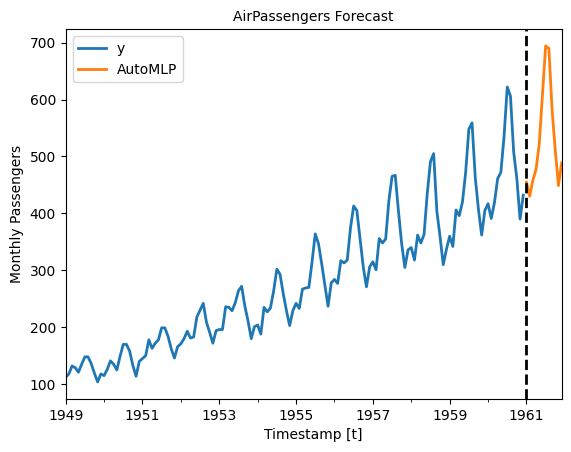

In [12]:
plt.figure(figsize = (12, 3))
plot_df[['y', 'AutoMLP']].plot(linewidth=2)

plt.title('AirPassengers Forecast', fontsize=10)
plt.ylabel('Monthly Passengers', fontsize=10)
plt.xlabel('Timestamp [t]', fontsize=10)
plt.axvline(x = plot_df.index[-horizon], color='k', linestyle='--', linewidth=2)
plt.legend(prop={'size': 10})

### End of execution

In [13]:
end = time.time()

delta = (end - start)

hours = int(delta/3_600)
mins = int((delta - hours*3_600)/60)
secs = int(delta - hours*3_600 - mins*60)

print(f'Hours: {hours}, Minutes: {mins}, Seconds: {secs}')

Hours: 0, Minutes: 0, Seconds: 24
